In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy

# Mini proyecto #2
* Estefanía Barrio - 17927
* Paul Belches - 17088

In [114]:
np.random.seed(0)

In [115]:
intRanValues = (np.random.rand(1000) *50) //1

In [116]:
ranValues = (2 * np.random.rand(1000)) - 1

## Ejercicio 1

### Algoritmo

1. Generar un valor enterto positivo I, tal que P(I=j) = pj
2. Si I = j, entonces optener el valor de Y = Fj
3. X = Y

### Demostración

$(1) P(X \le x) = \frac{P(X \le x)}{P(I = j)} * P(I = j) = \newline
(2) = \frac{P(X \le x)}{P(I = j)} * P(I = j) = \frac{P(X \le x \cap I = j)}{P(I = j)} * P(I = j) = \newline
(3)\sum_{j=1}^∞  P(X \le x | I = j)P(I=j)$

$(1) P(X \le x) = \sum_{j=1}^∞  P(X \le x | I = j)P(I=j) =\newline
(2) \sum_{j=1}^∞  P(Yj \le x )P(I=j)=\newline
(3) \sum_{j=1}^∞  Fj(x)pj=\newline
(4) Fx(X)\newline $

Haugh,M(2017)Generating Random Variables and Stochastic
Processes. Columbia Univ

## Ejercicio 2

In [131]:
def randomVariableGenerator(fun, values):
    return fun(values)

In [132]:
SIGMA = 0.5

In [133]:
def factorial(x):
    r = []
    for i in x:
        r.append(scipy.math.factorial(i))
    return np.asarray(r)

In [134]:
def normal(x):
    return (1/(SIGMA*(2*math.pi)**0.5))*np.exp(-0.5*(x/SIGMA)**2)

In [135]:
def exponencial(x):
    return 5*np.exp(-x*5)

In [136]:
def poisson(x):
    alpha = 10
    return np.exp(-alpha)*((alpha**x)/factorial(x))

In [137]:
x = ranValues

In [138]:
y = randomVariableGenerator(normal, x)

<BarContainer object of 1000 artists>

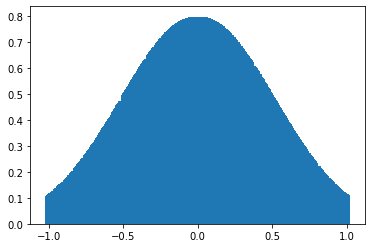

In [139]:
plt.bar(x, y, width=0.05)

In [140]:
y = randomVariableGenerator(exponencial, x)

<BarContainer object of 1000 artists>

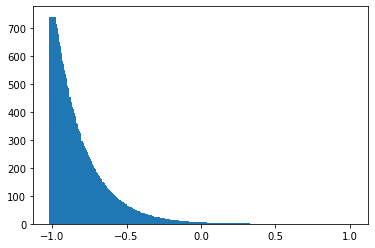

In [141]:
plt.bar(x, y, width=0.05)

In [142]:
x = intRanValues

In [143]:
y = randomVariableGenerator(poisson, x)

<BarContainer object of 1000 artists>

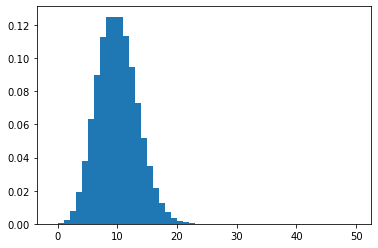

In [144]:
plt.bar(x, y, width=2)

## Ejercicio 3

In [15]:
def vpn(fn,p):
    suma=float(fn[0])
    for i in range(len(fn)-1):
        t=i+1
        value=float(fn[t]/(1+p)**t)
        suma=suma+value
    return suma
    

In [16]:
def aver(n):
    i=0
    s1=0
    s2=0
    while i<n:
        list1=[-float(800),float(np.random.normal(-800,50,1)),float(np.random.normal(-800,100,1)),float(np.random.normal(-700,150,1)),float(np.random.normal(300,200,1)),float(np.random.normal(400,200,1)),float(np.random.normal(500,200,1)),float(np.random.uniform(200,8440,1))]
        list2=[-float(900),float(np.random.normal(-600,50,1)),float(np.random.normal(-200,50,1)),float(np.random.normal(-600,100,1)),float(np.random.normal(250,150,1)),float(np.random.normal(350,150,1)),float(np.random.normal(400,150,1)),float(np.random.uniform(1600,6000,1))]
        s1=s1+vpn(list1,1/10)
        s2=s2+vpn(list2,1/10)
        i=i+1
    return s1/n,s2/n

In [17]:
iter=[100,1000,10000]
for i in range(len(iter)):
    s1,s2=aver(iter[i])
    if s1<s2:
        print("Con ", str(iter[i]), "iteraciones, la inversion en el proyecto del centro comercial es mejor pues con esa el valor presente neto sera de ", str(s2), ", mientras que con la inversion en el proyecto hotel el valor presente neto seria de ", str(s1))
    else:
        print("Con ", str(iter[i]), "iteraciones, la inversion en el proyecto del hotel es mejor pues con esa el valor presente neto sera de ", str(s1), ", mientras que con la inversion en el proyecto centro comercial el valor presente neto seria de ", str(s2))    

Con  100 iteraciones, la inversion en el proyecto del centro comercial es mejor pues con esa el valor presente neto sera de  487.52006770052407 , mientras que con la inversion en el proyecto hotel el valor presente neto seria de  296.48860192835906
Con  1000 iteraciones, la inversion en el proyecto del centro comercial es mejor pues con esa el valor presente neto sera de  503.6714645430553 , mientras que con la inversion en el proyecto hotel el valor presente neto seria de  273.8623797513325
Con  10000 iteraciones, la inversion en el proyecto del centro comercial es mejor pues con esa el valor presente neto sera de  493.75410985774045 , mientras que con la inversion en el proyecto hotel el valor presente neto seria de  245.79863099277912


## Ejercicio 4

Para  30  dias se tienen los valores de ganancias siguientes


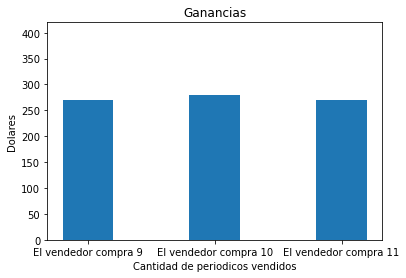

Al vendedor le conviene comrpar  10  periodicos
Para  365  dias se tienen los valores de ganancias siguientes


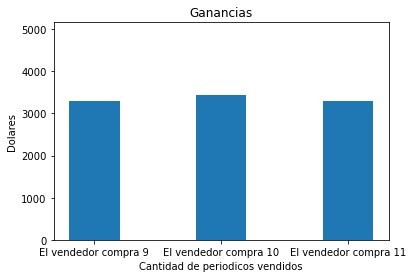

Al vendedor le conviene comrpar  10  periodicos
Para  3650  dias se tienen los valores de ganancias siguientes


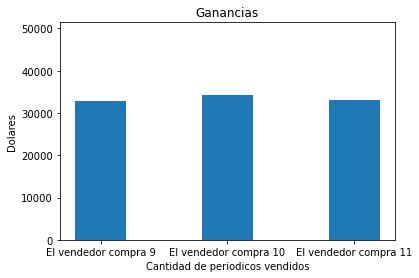

Al vendedor le conviene comrpar  10  periodicos


In [14]:
elements=[9,10,11]
probs=[0.3,0.4,0.3]
cant=[30,365,3650]
ganancia=1
perdida=-1

def hist(canti):
    nueve=0
    diez=0
    once=0
    list=np.random.choice(elements,canti,p=probs)
    for i in range(canti):
        j=int(list[i])
        if j==9:
            nueve=nueve+ganancia*9
            diez=diez+ganancia*9+perdida
            once=once+ganancia*9+perdida*2
        elif j==10:
            nueve=nueve+ganancia*9
            diez=diez+ganancia*10
            once=once+ganancia*10+perdida
        elif j==11:
            nueve=nueve+ganancia*9
            diez=diez+ganancia*10
            once=once+ganancia*11
    ganancias=[nueve,diez,once]
    nombre=["El vendedor compra 9", "El vendedor compra 10", "El vendedor compra 11"]
    fig,ax=plt.subplots()
    barplot=plt.bar(nombre,ganancias,width=0.4)
    altura=max(ganancias)*1.5
    plt.title("Ganancias")
    plt.xlabel("Cantidad de periodicos vendidos")
    plt.ylabel("Dolares")
    ax.set_ylim(0,altura)
    plt.show()
    maxi=max(ganancias)
    for j in range(3):
        val=ganancias[j]
        if val==maxi:
            print("Al vendedor le conviene comrpar ",str(elements[j])," periodicos")
        
for i in range(len(cant)):
    canti=cant[i]
    print("Para ", str(cant[i]), " dias se tienen los valores de ganancias siguientes")
    hist(canti)